In [4]:
%matplotlib inline
%config InlineBackend.figure_format='retina'

import numpy             as np
import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 300

from numpy.fft    import fft, ifft
from numpy.random import normal
from random       import choice
from math         import ceil

In [5]:
Fs = 22050
Ts = 1/Fs

A = 1
K = 14
W = 1575

BITS_PER_BYTE  = 8
NUMBER_OF_BITS = 10 * BITS_PER_BYTE
SIGNAL_LENGTH  = NUMBER_OF_BITS * K

t = np.linspace(0, Ts*NUMBER_OF_BITS, SIGNAL_LENGTH)

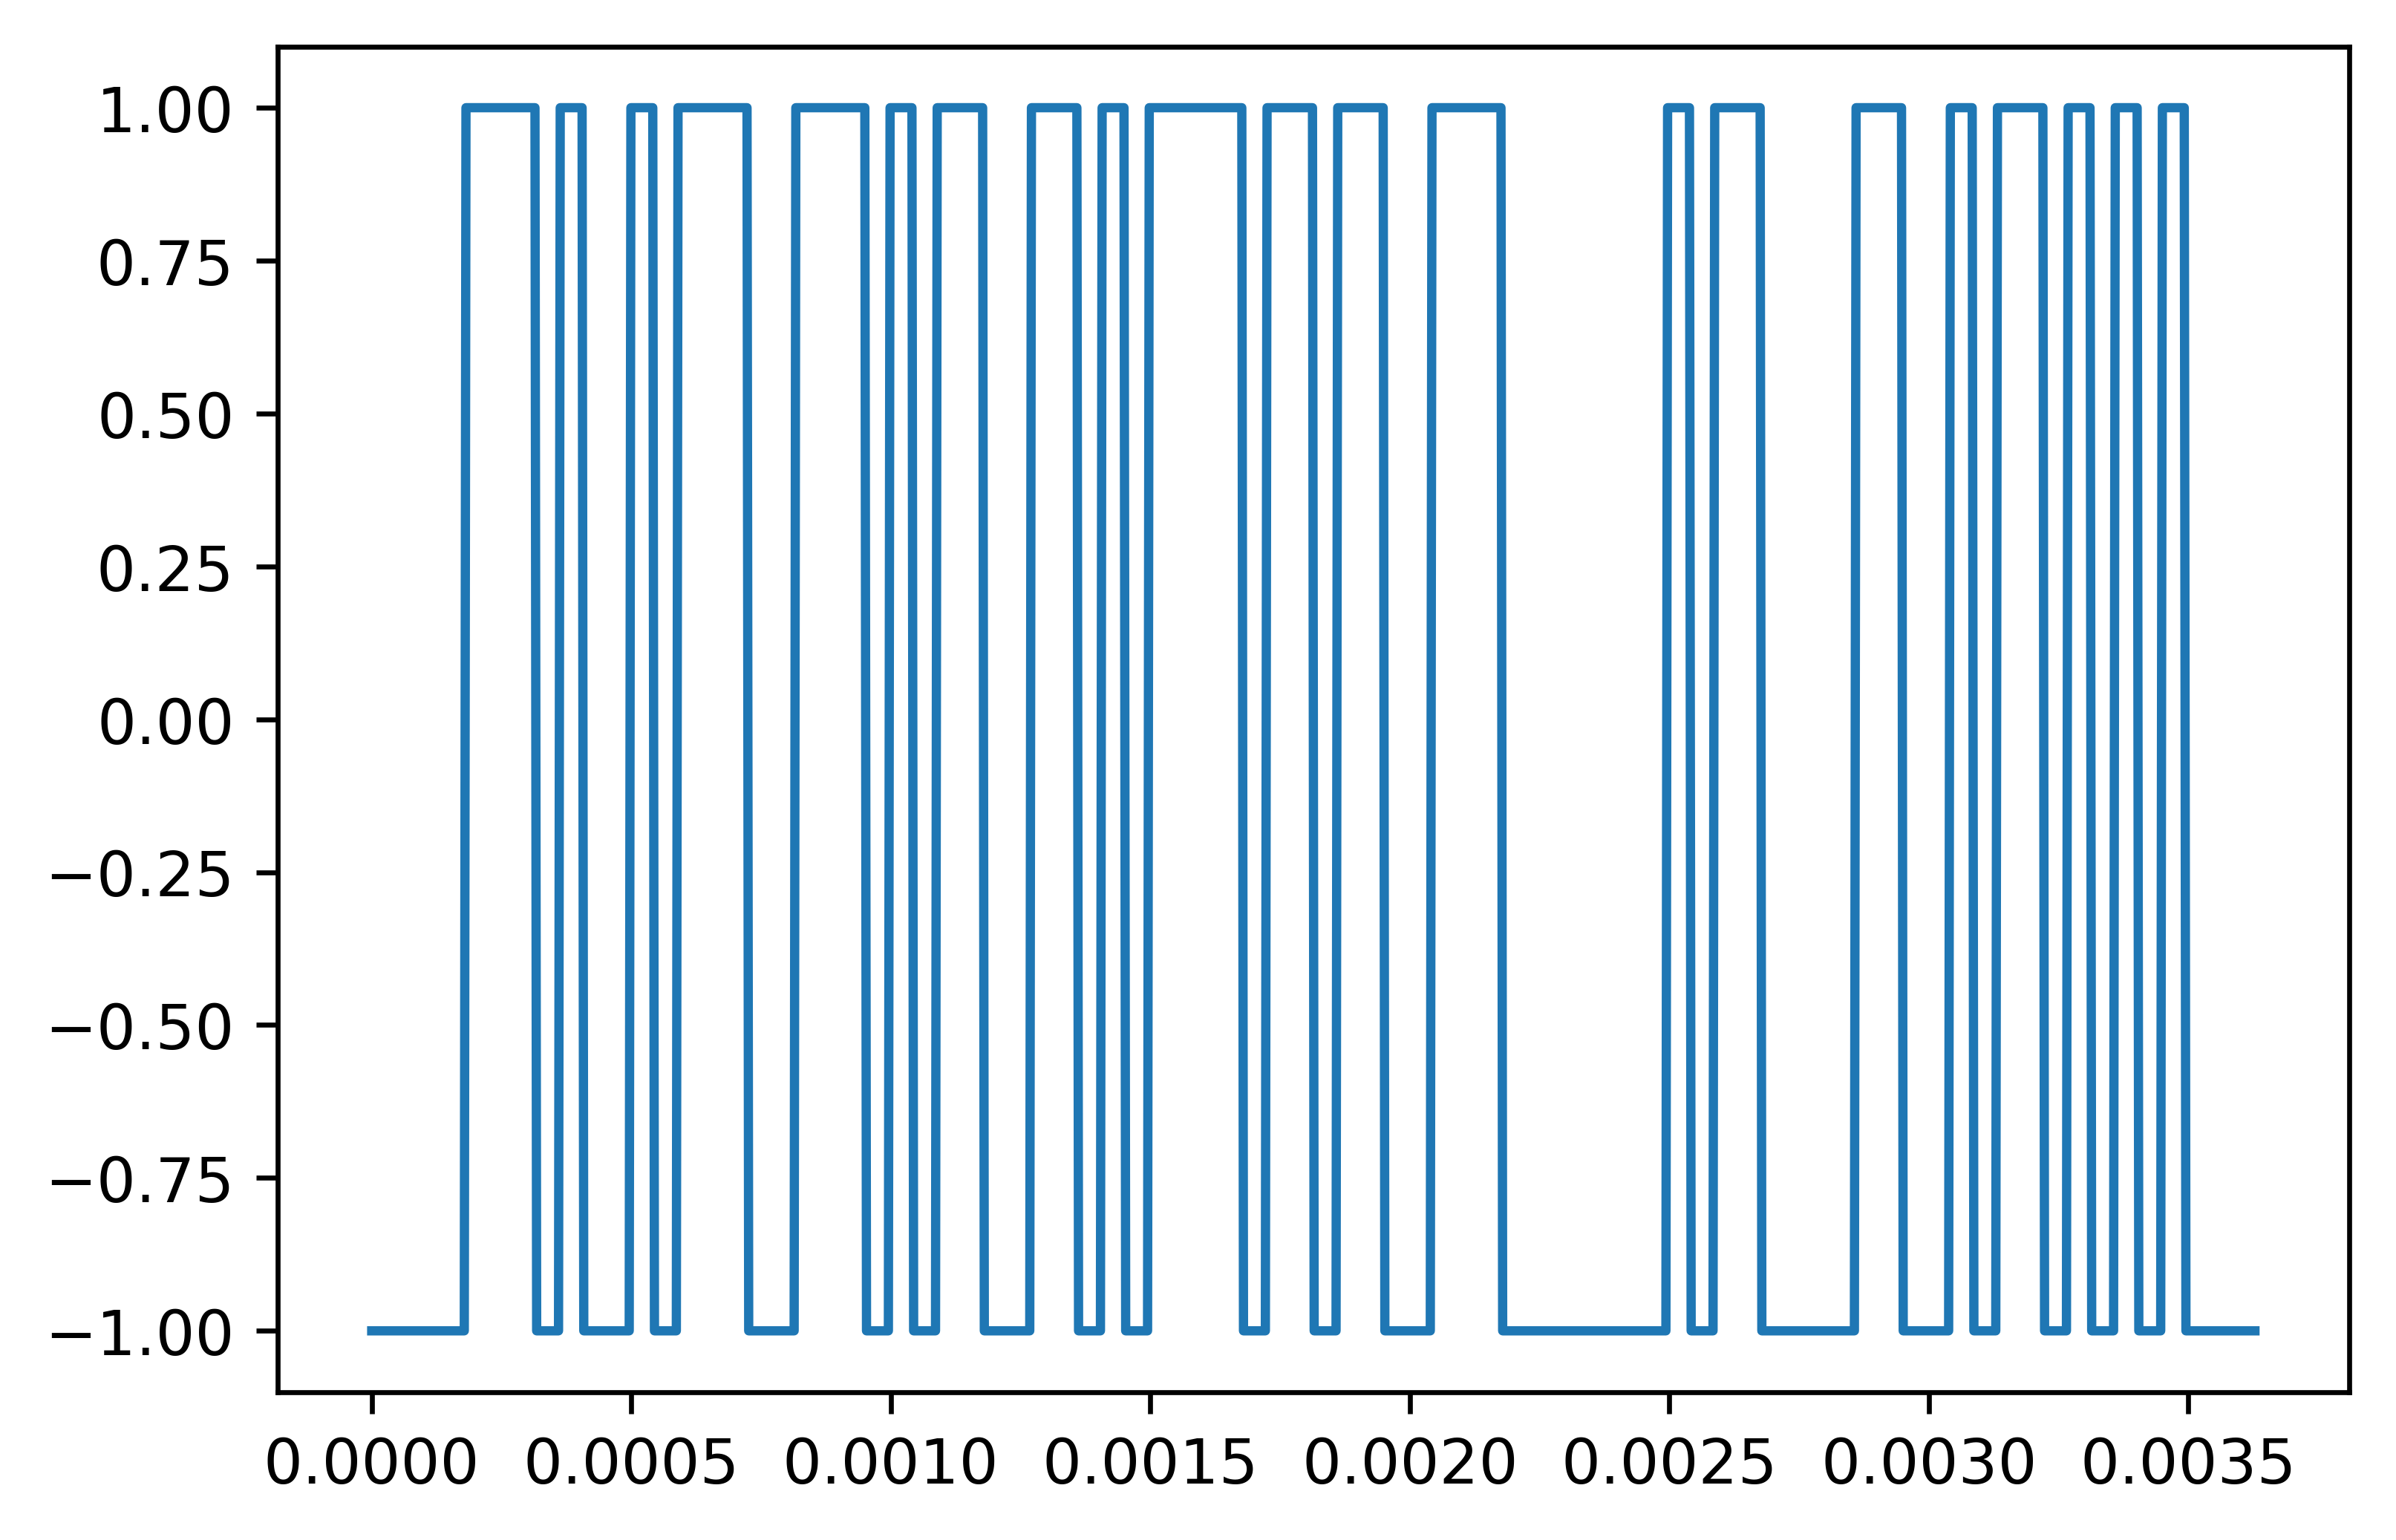

In [6]:
bits   = [A if b else -A for b in [choice([True, False]) for _ in range(NUMBER_OF_BITS)]]
signal = np.repeat(bits, K)
plt.plot(t, signal)
plt.show()

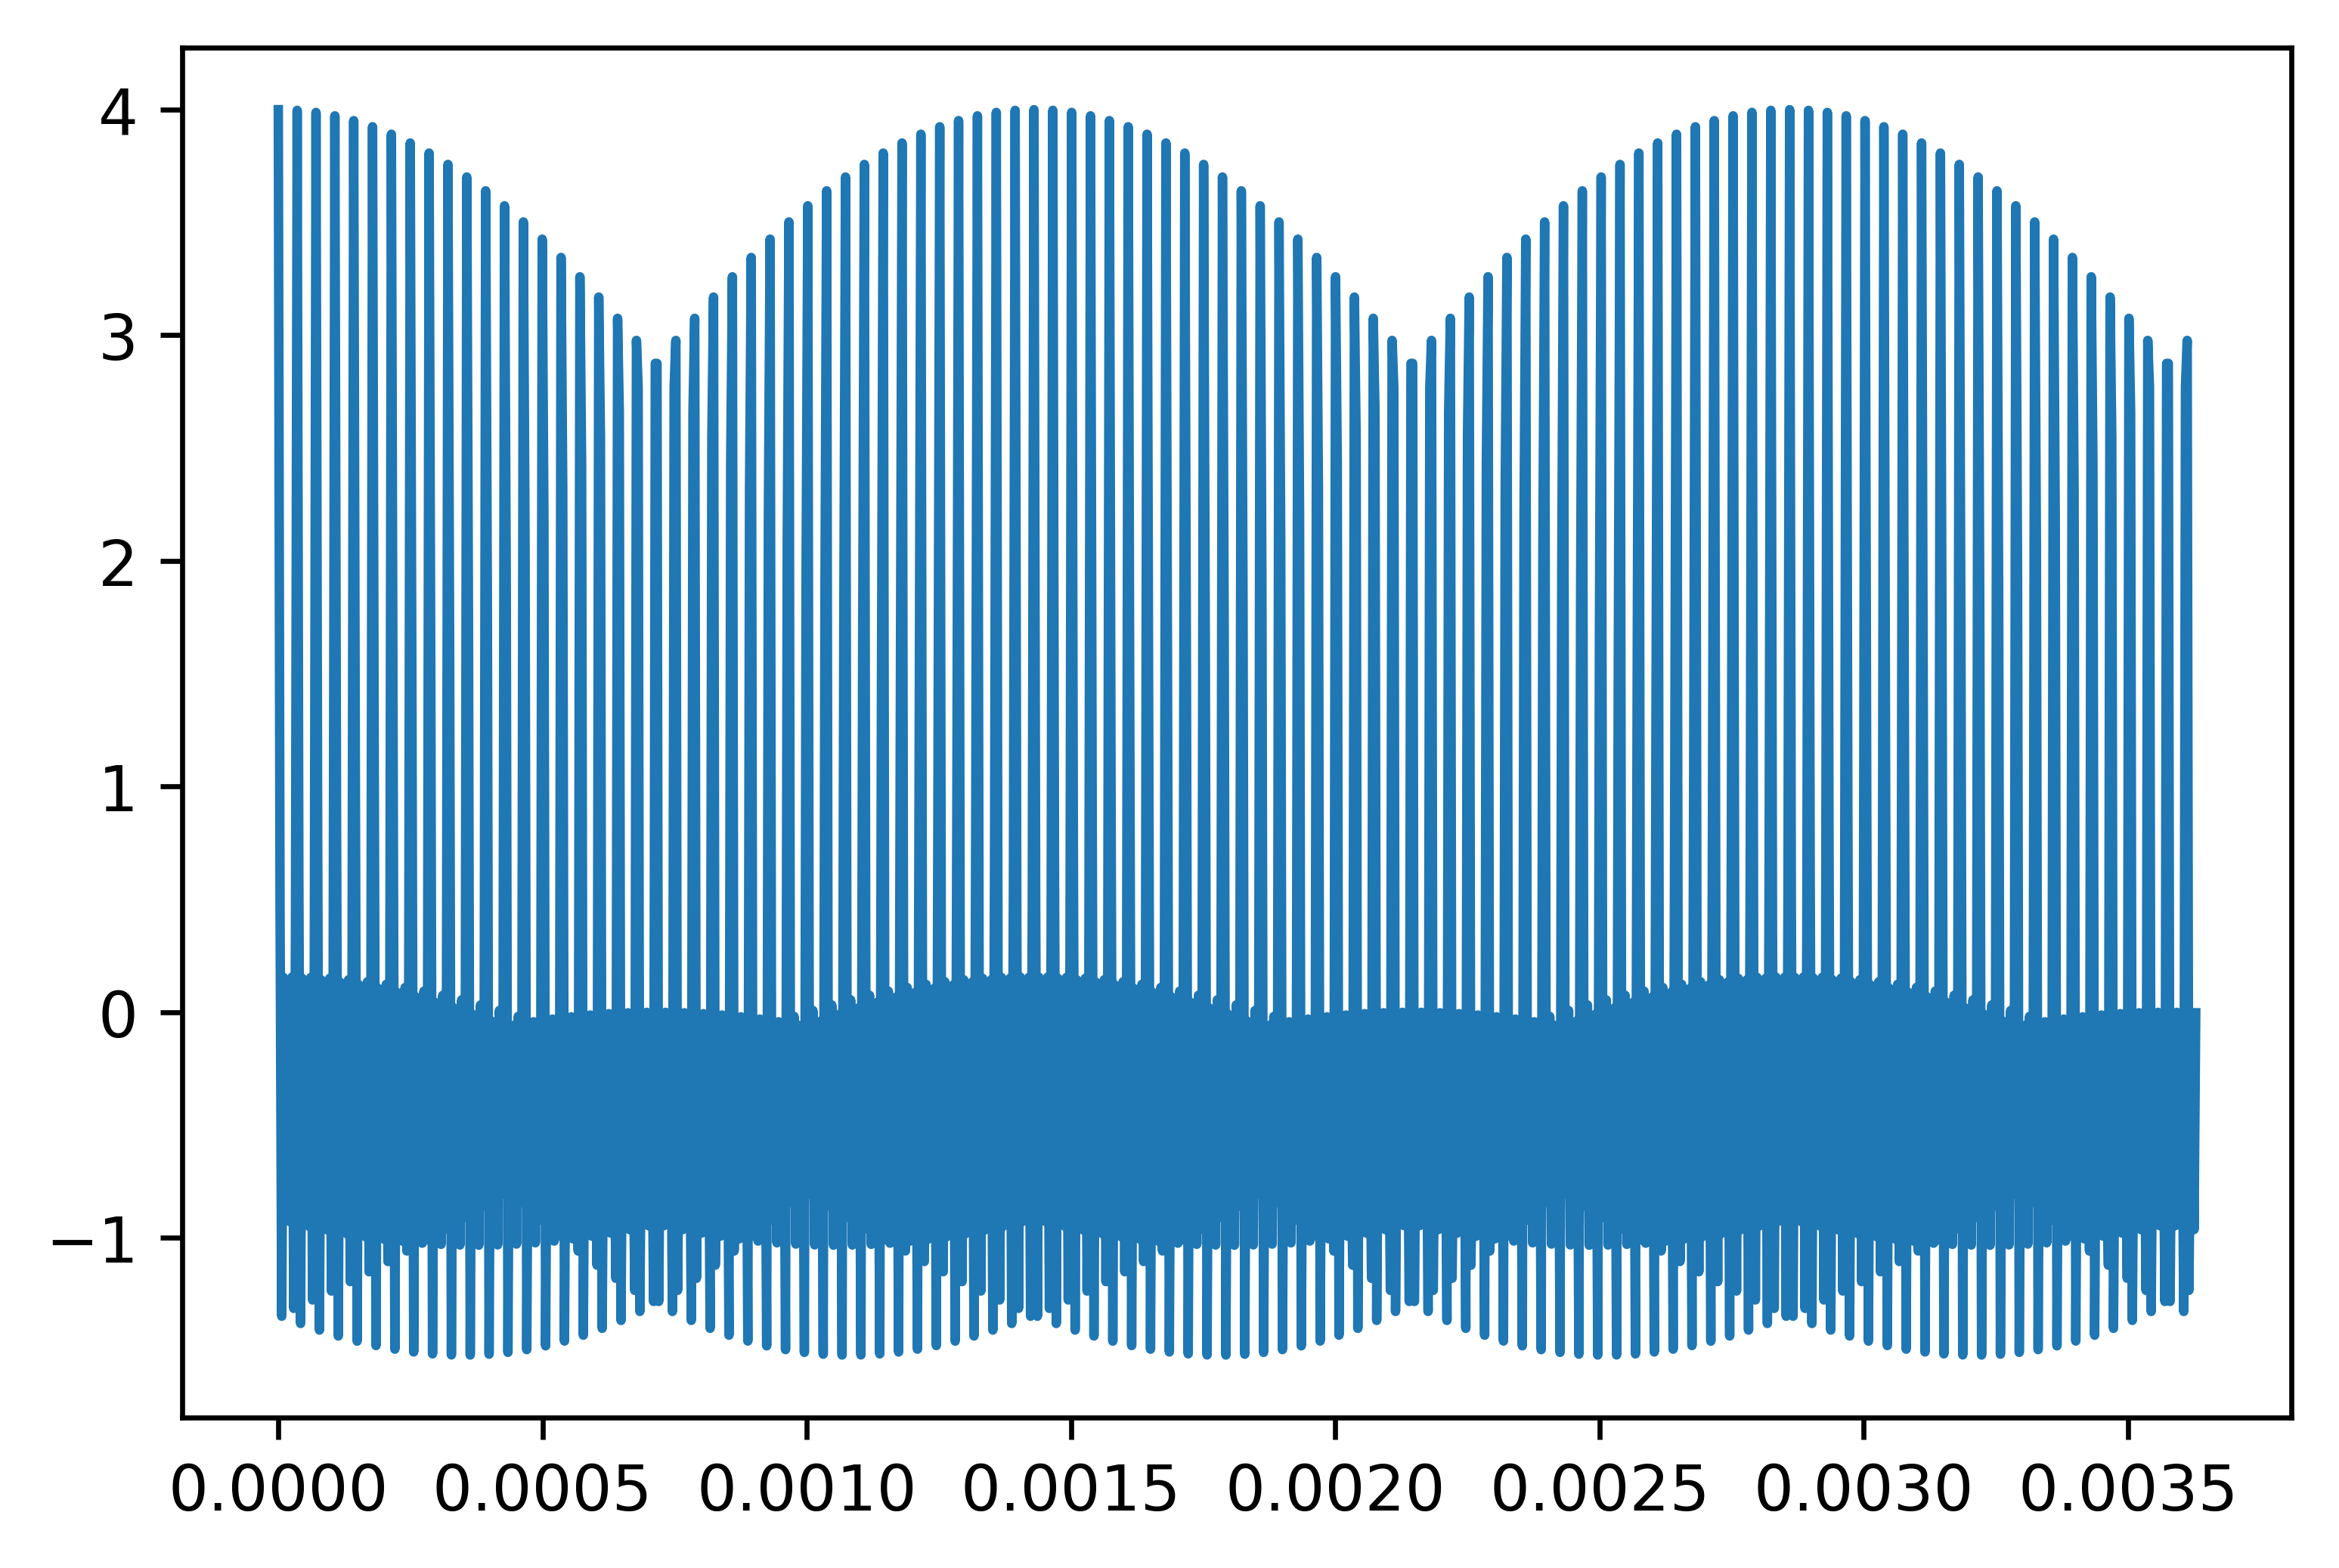

In [7]:
cos_modulation_2000 = np.array([np.cos(2*np.pi*2000*a*Ts) for a in range(SIGNAL_LENGTH)])
cos_modulation_4000 = np.array([np.cos(2*np.pi*4000*a*Ts) for a in range(SIGNAL_LENGTH)])
cos_modulation_6000 = np.array([np.cos(2*np.pi*6000*a*Ts) for a in range(SIGNAL_LENGTH)])
cos_modulation_8000 = np.array([np.cos(2*np.pi*8000*a*Ts) for a in range(SIGNAL_LENGTH)])
cos_modulation      = cos_modulation_2000 + cos_modulation_4000 + cos_modulation_6000 + cos_modulation_8000
plt.plot(t, cos_modulation)
plt.show()

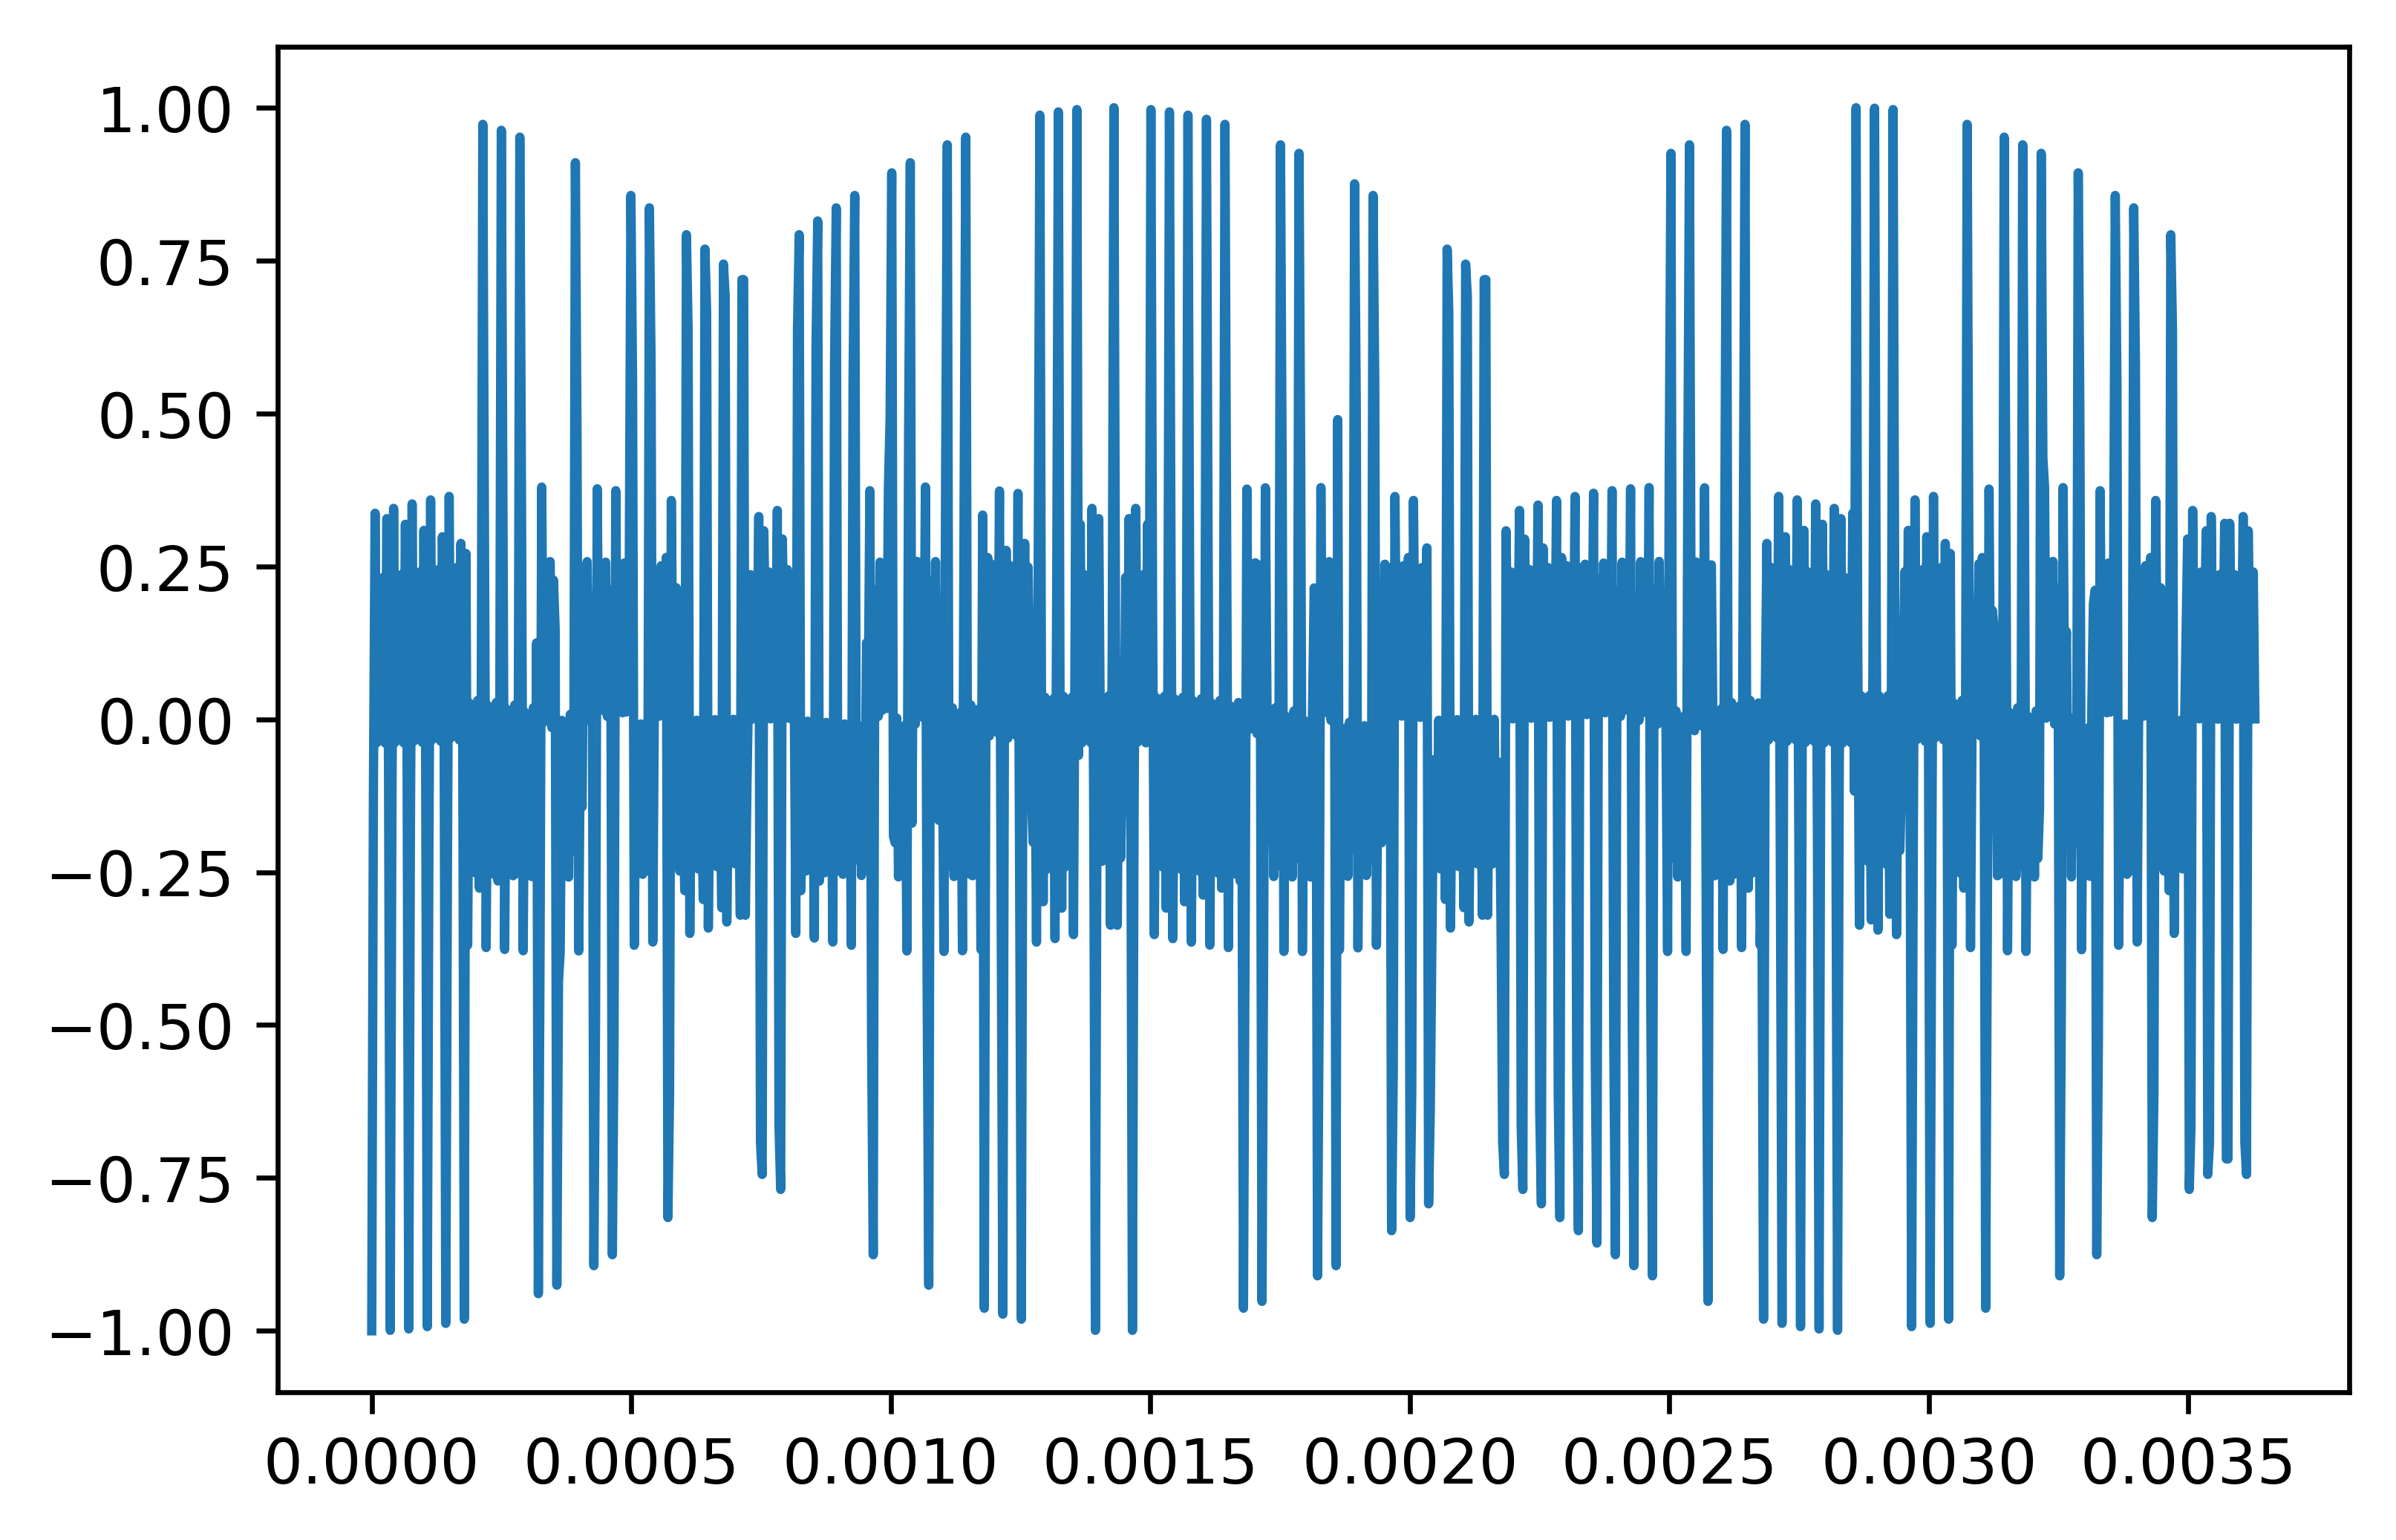

In [8]:
modulated_signal = cos_modulation*signal/4
plt.plot(t, modulated_signal)
plt.show()

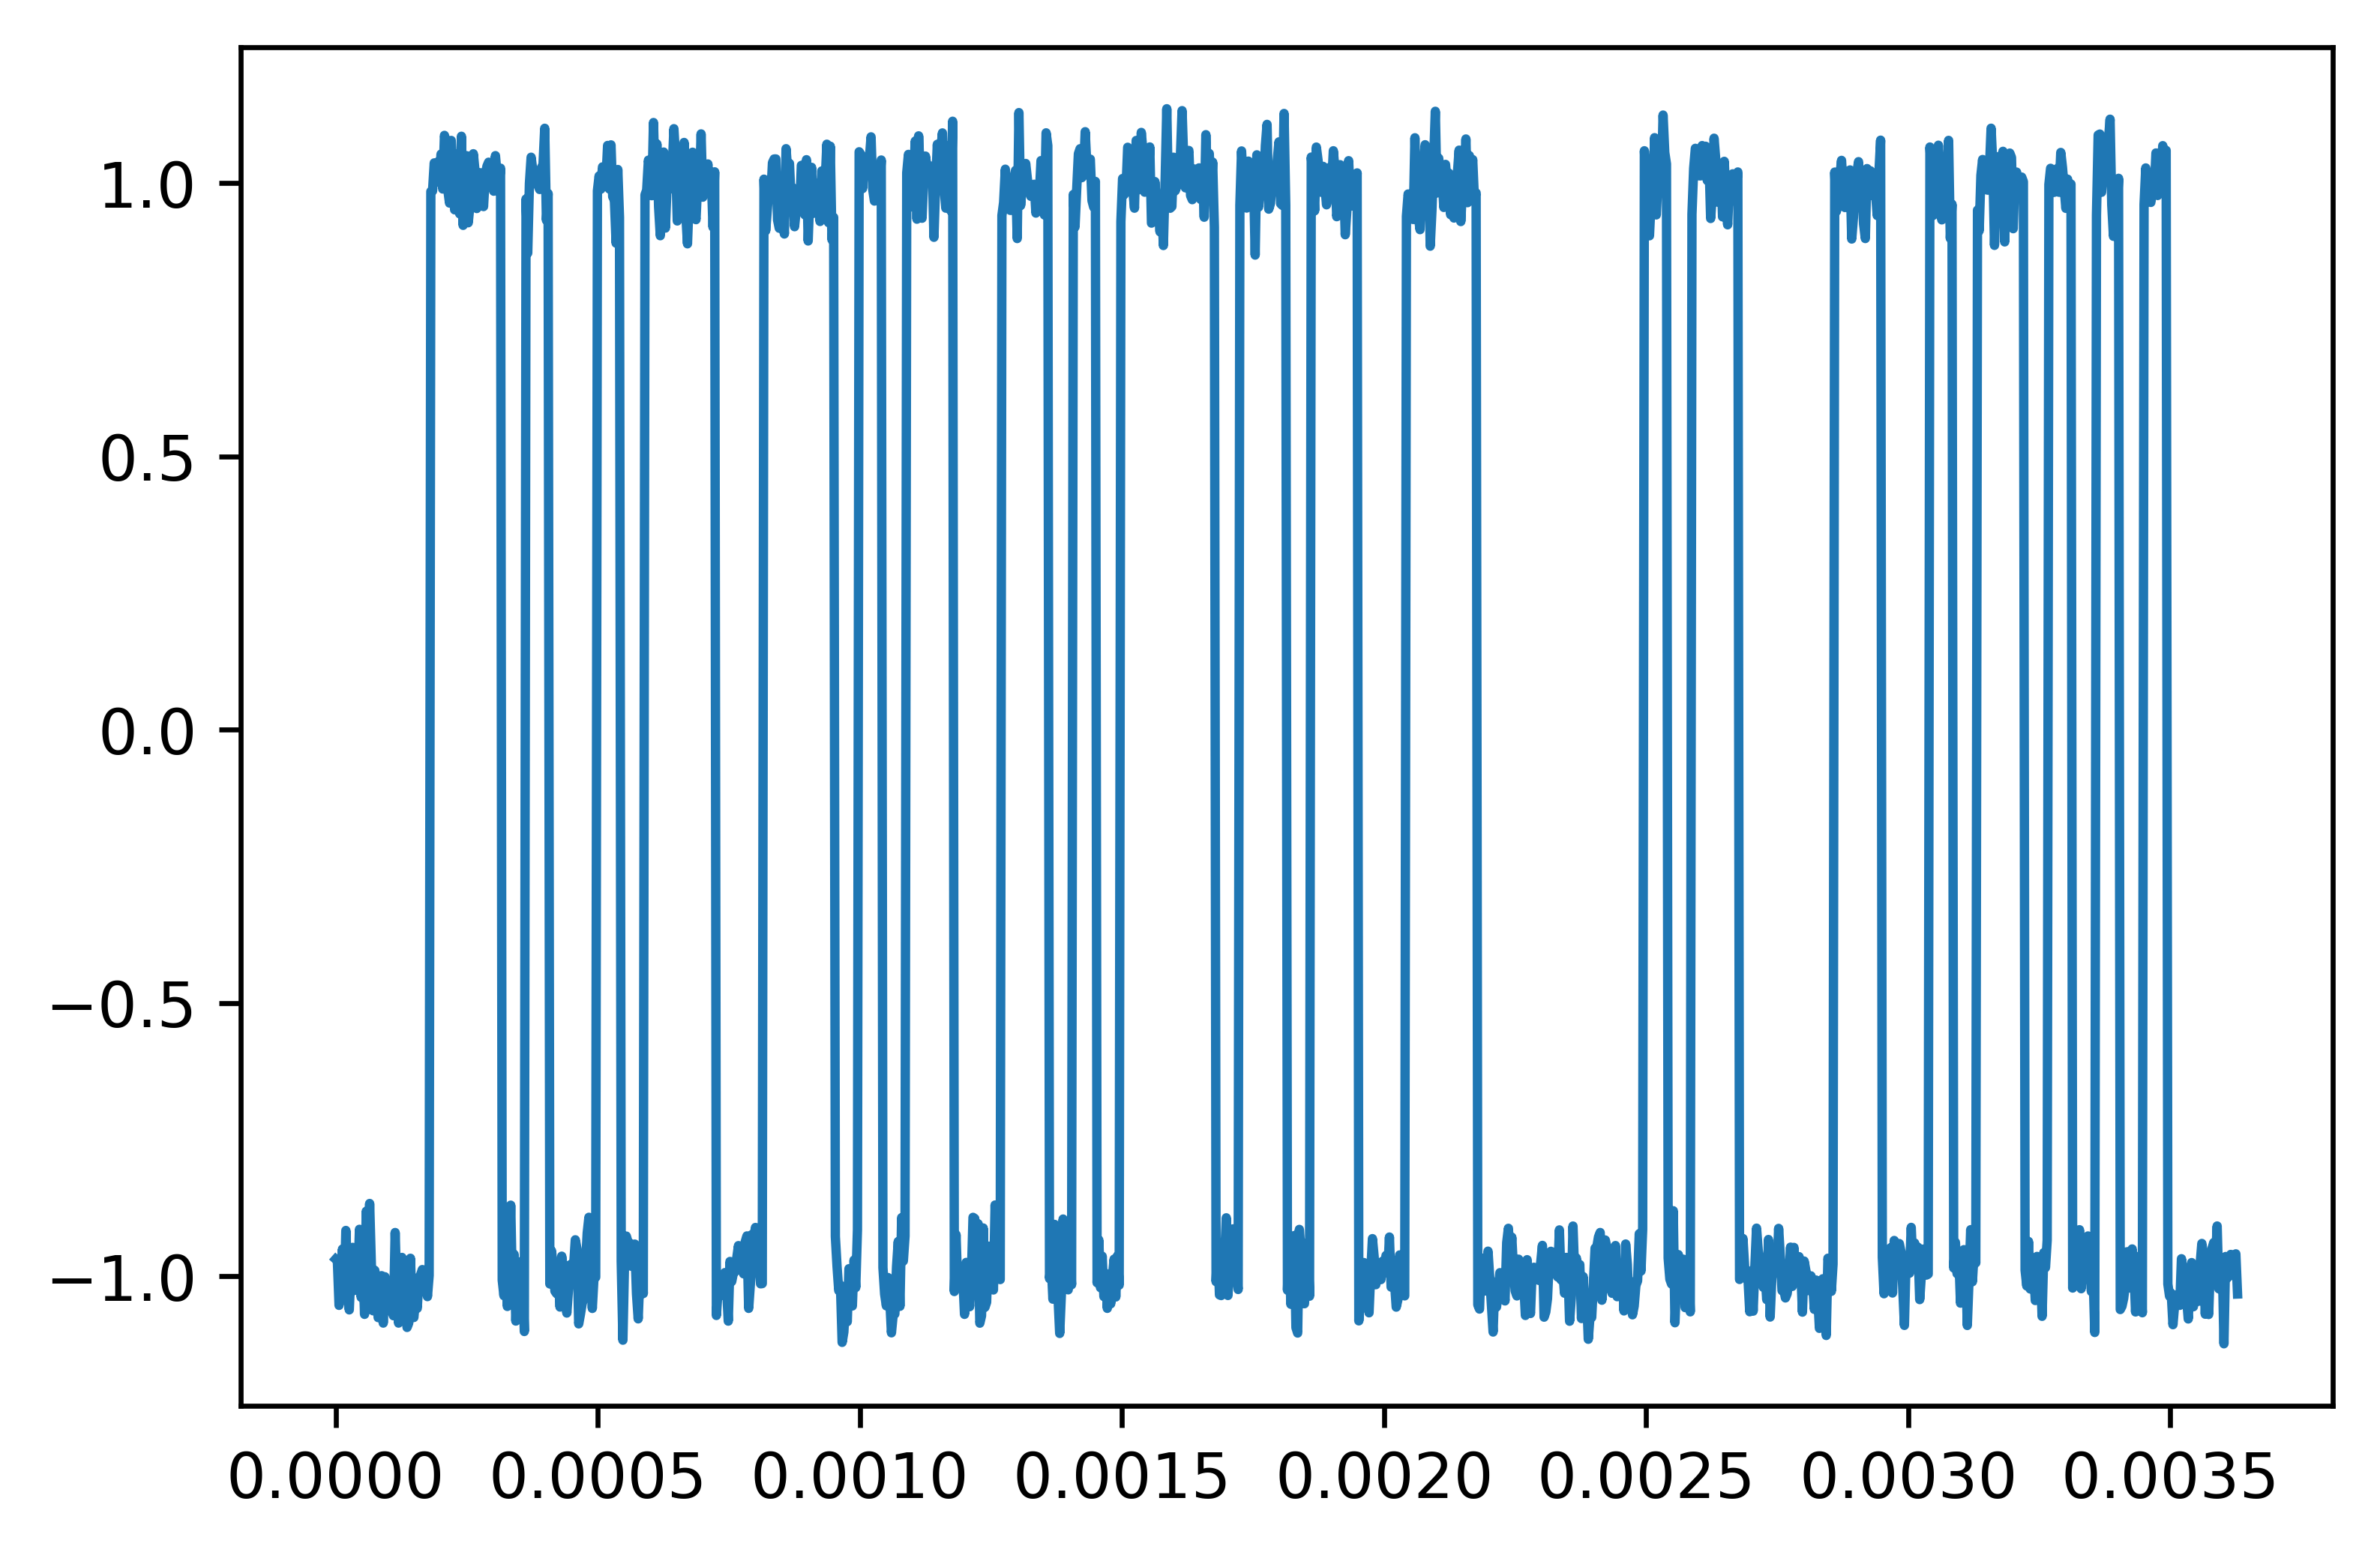

In [15]:
white_noise = normal(0, 0.05, SIGNAL_LENGTH)
plt.plot(t, signal+white_noise)
plt.show()

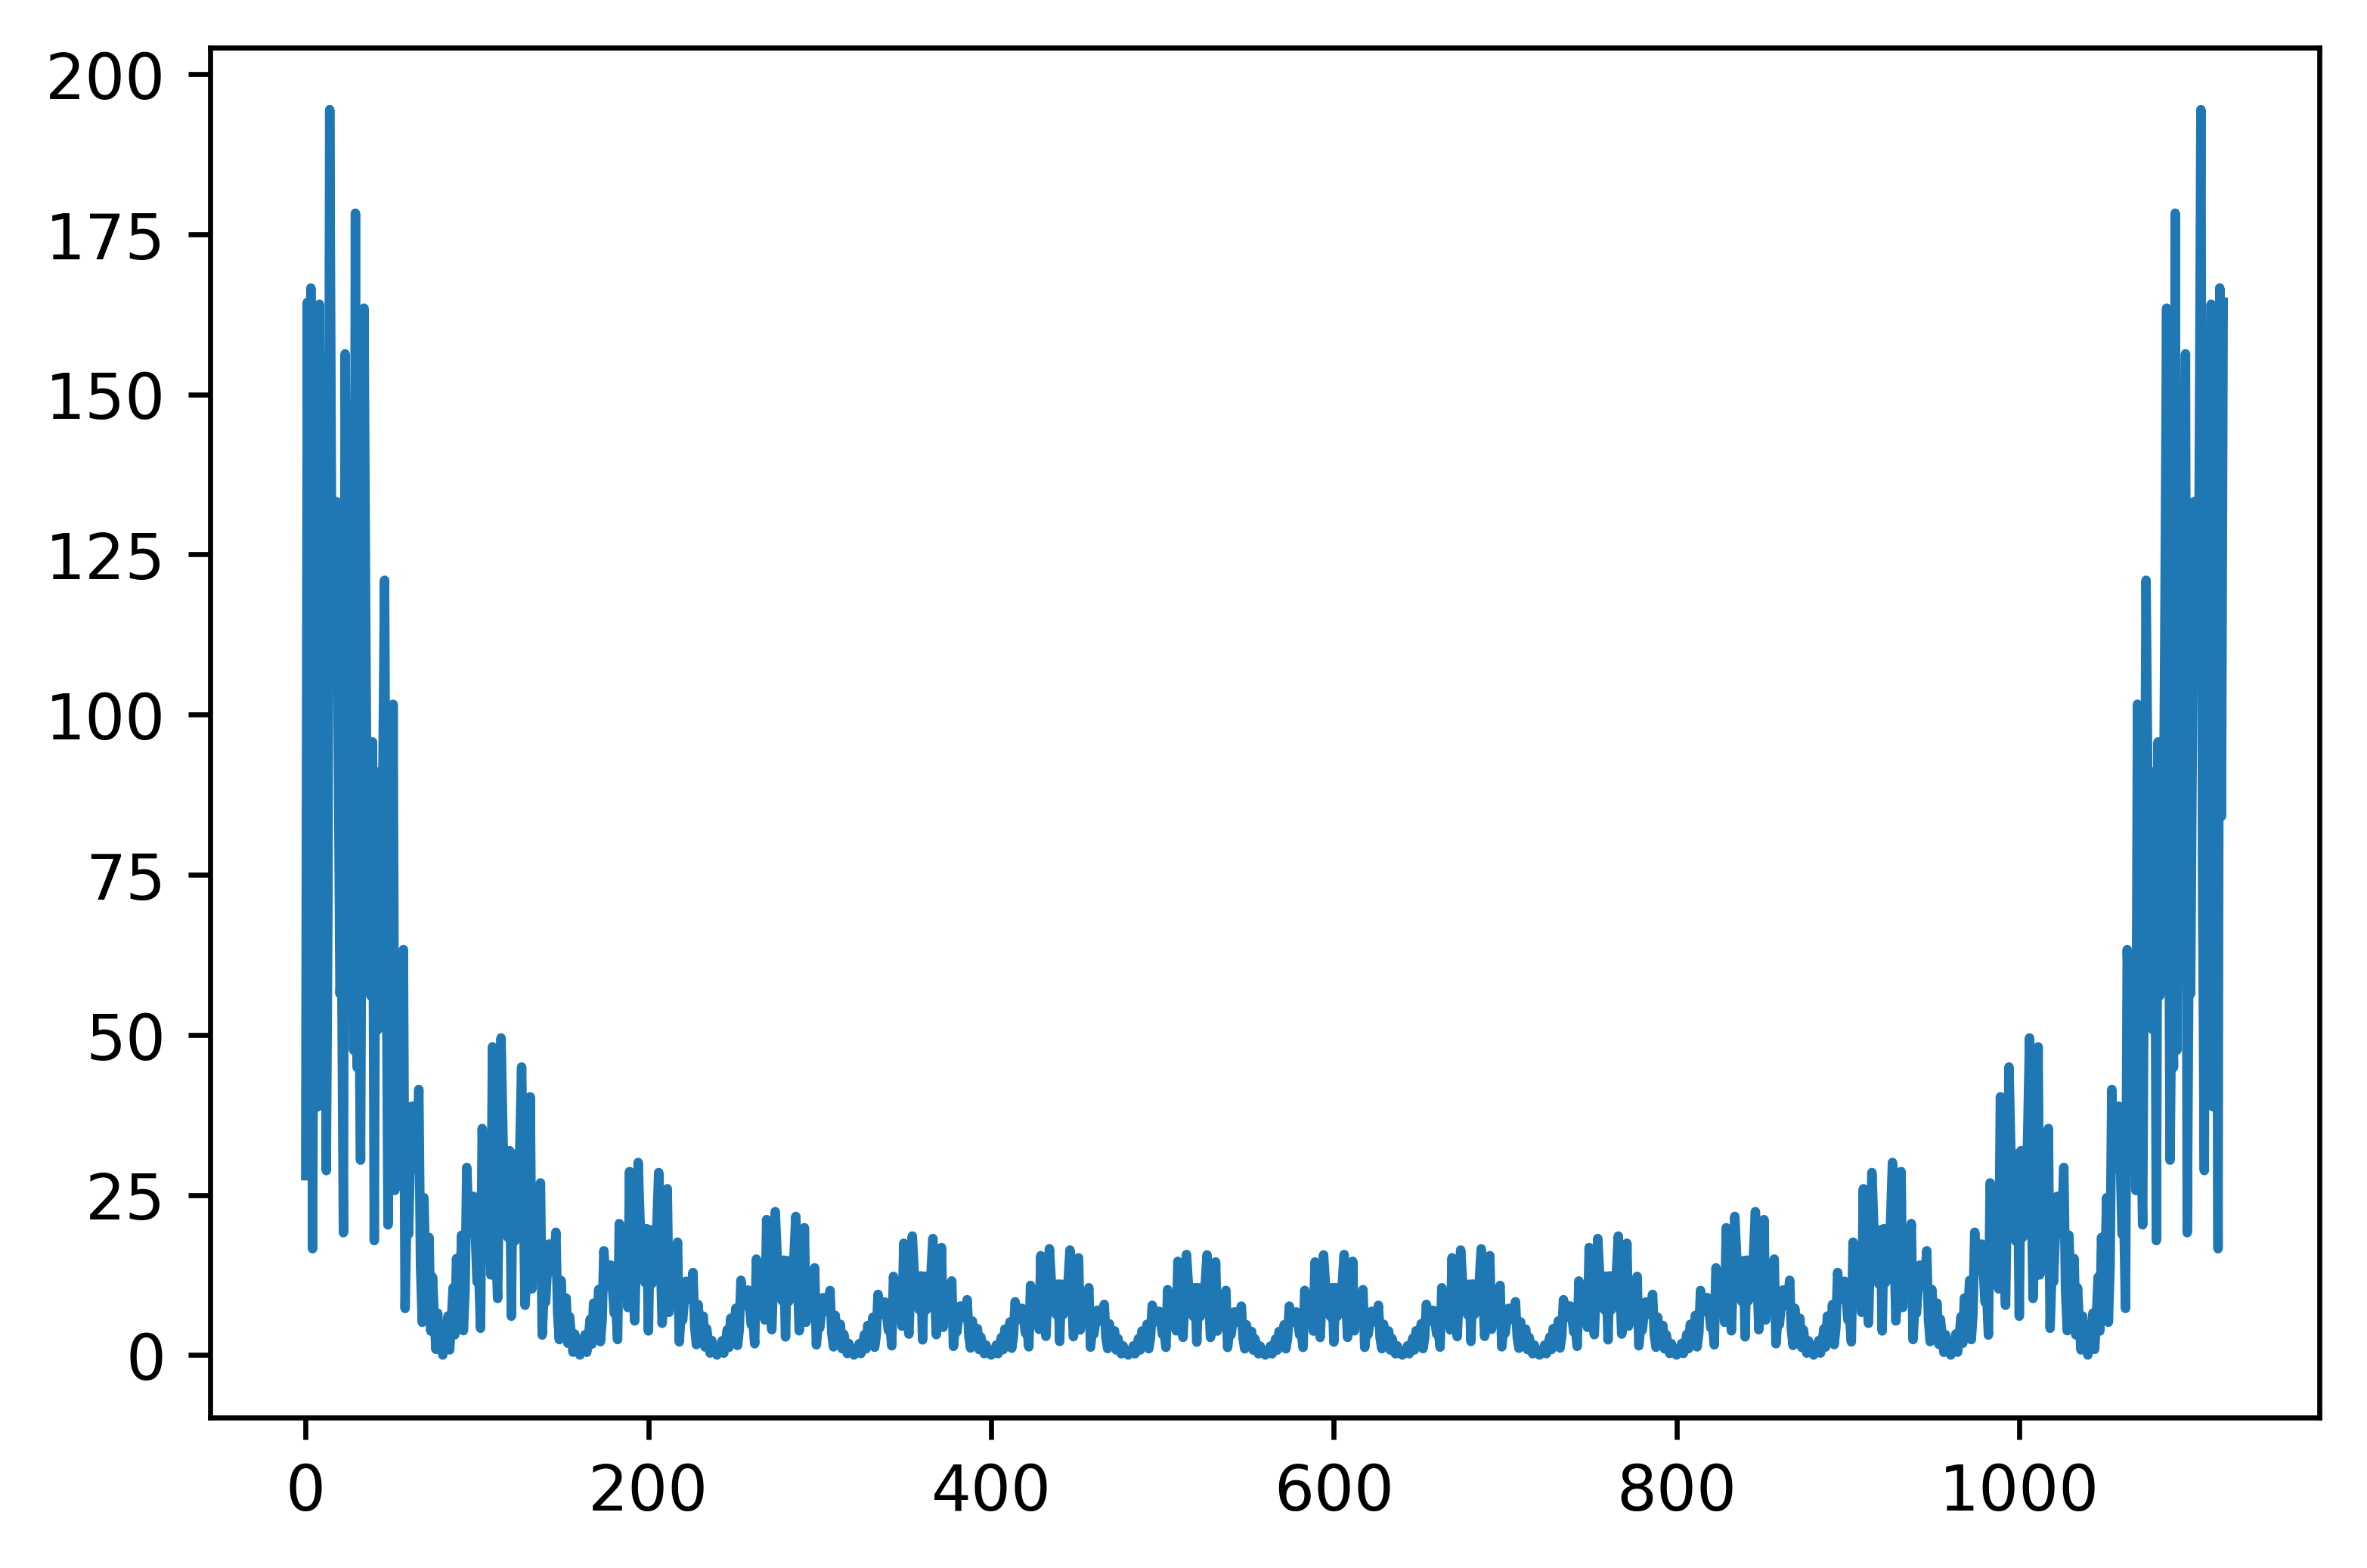

In [10]:
frequencies = fft(signal)
plt.plot(abs(frequencies))
plt.show()

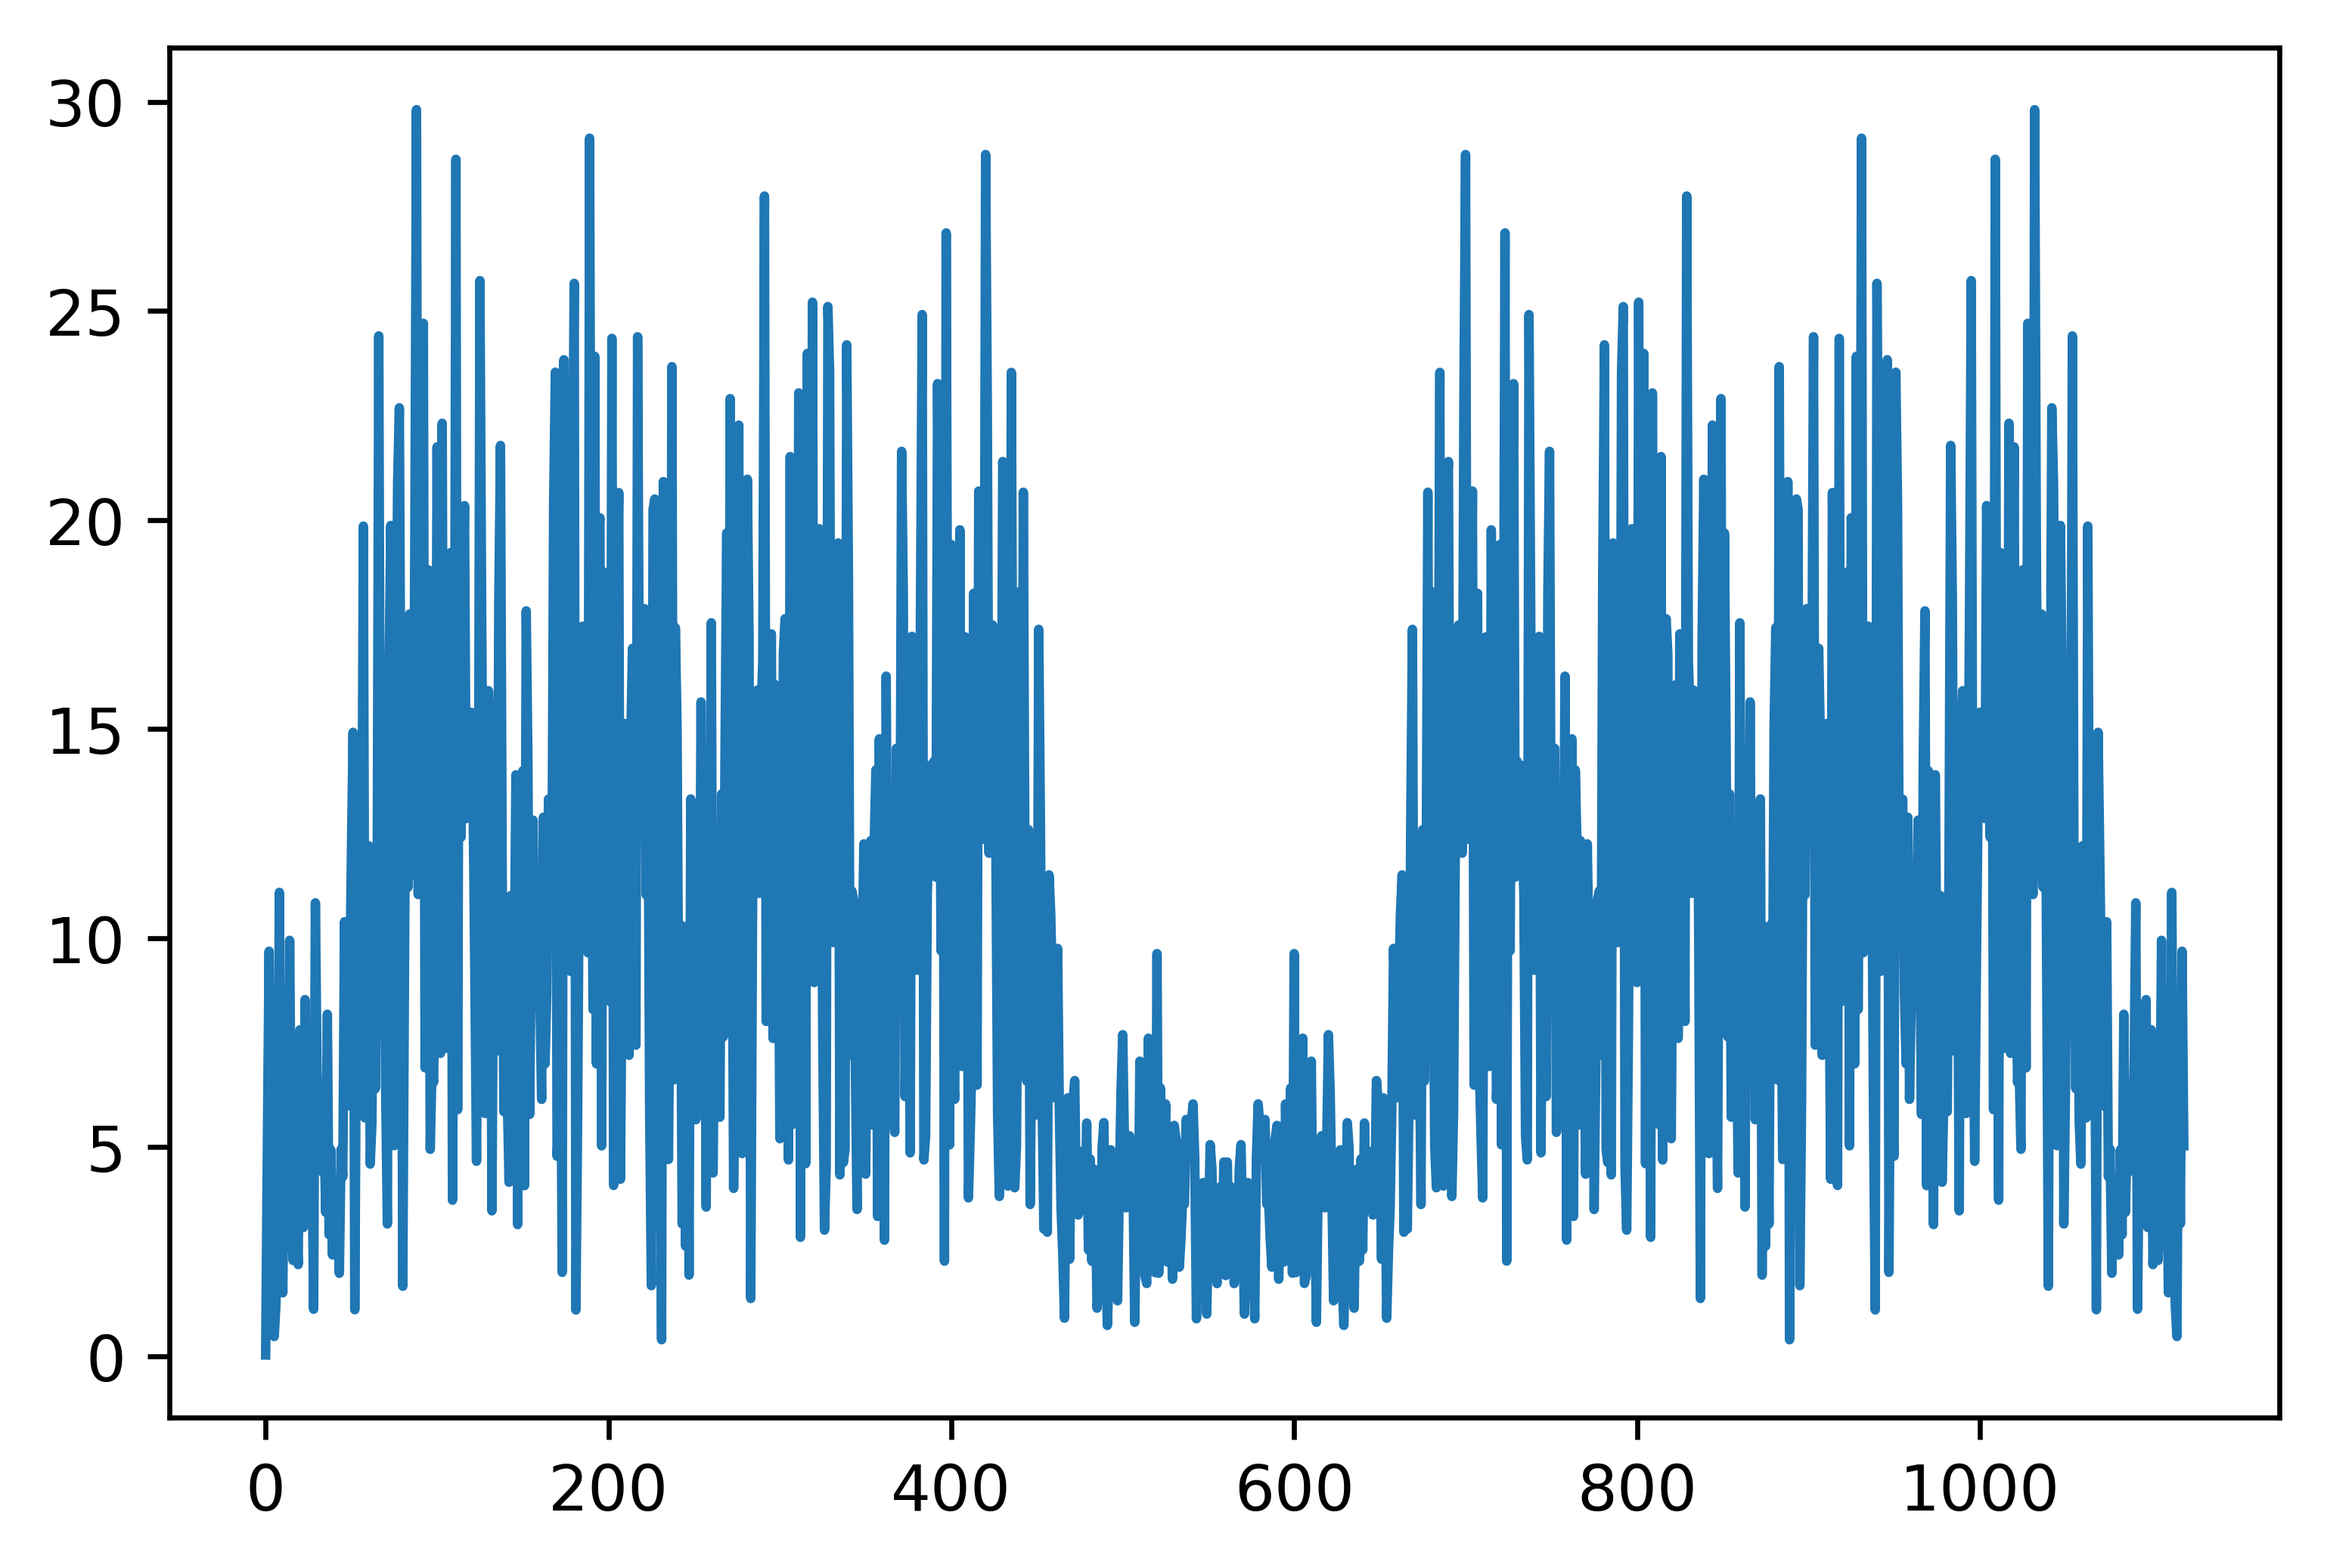

In [11]:
modulated_frequencies = fft(modulated_signal)
plt.plot(abs(modulated_frequencies))
plt.show()

/home/thenitronos/anaconda3/lib/python3.7/site-packages/numpy/core/numeric.py:501: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


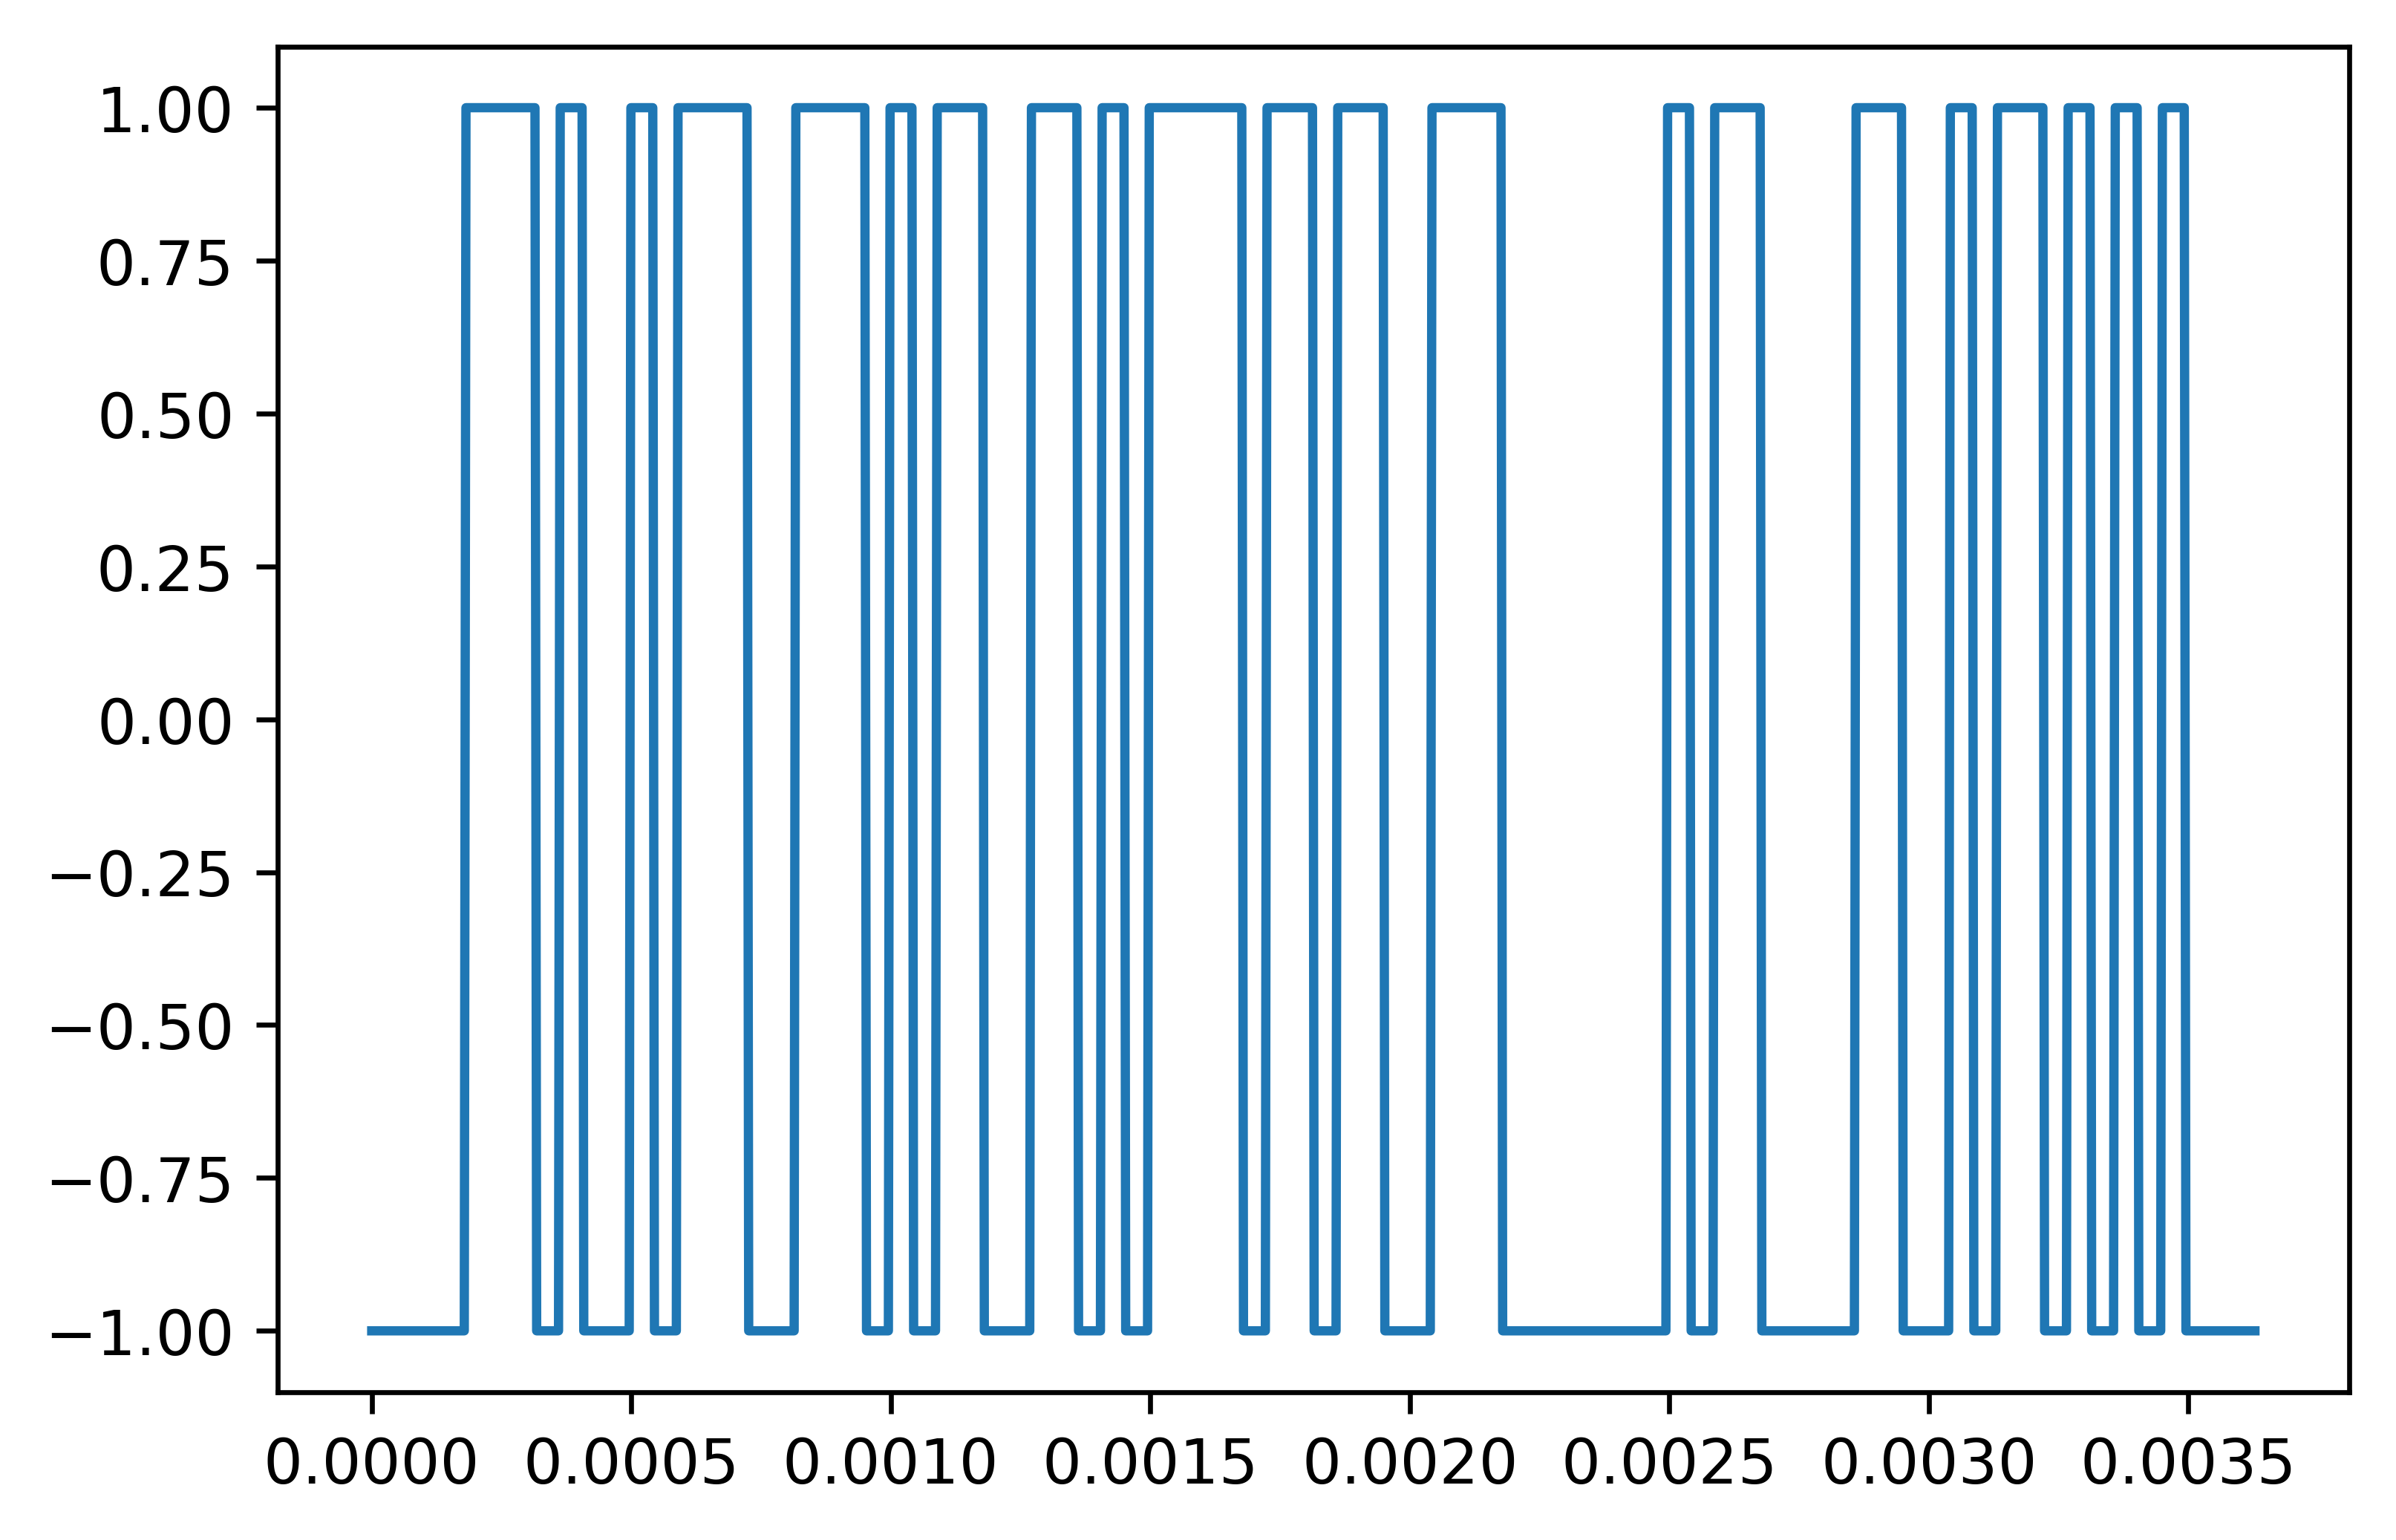

In [12]:
signal_ifft = ifft(frequencies)
plt.plot(t, signal_ifft)
plt.show()

In [ ]:
modulated_signal_ifft = ifft(modulated_frequencies)
plt.plot(t, modulated_signal_ifft/cos_modulation)
plt.show()

In [ ]:
def decode(signal_ifft):
    signal_input  = signal[-SIGNAL_LENGTH:]
    signal_output = []
    
    for i in range(NUMBER_OF_BITS):
        acc = 0
        for j in range(K):
            acc += signal_input[i * K + j]
        signal_output.append(acc//K)
        
    return signal_output

In [ ]:
if (decode(signal_ifft) == bits):
    print("OK!")

In [ ]:
if (decode(signal_ifft) == bits):
    print("OK!")

In [ ]:
np.savetxt("signal.txt", modulated_signal)

In [ ]:
received = np.loadtxt("received.txt")

In [ ]:
received_frequencies = fft(received)
plt.plot(abs(received_frequencies))
plt.show()

In [ ]:
decoded_received = decode(received)
print(decoded_received)

In [ ]:
if (decode(decoded_received) == bits):
    print("OK!")

In [ ]:
print(bits)